In [7]:
#Objective
#To test whether the order in which reviews are displayed affects user satisfaction ratings for drugs.

#Null Hypothesis (H₀): The order of reviews does not affect Satisfaction ratings.
#Alternative Hypothesis (H₁): Ordered reviews lead to significantly different Satisfaction ratings compared to randomly ordered reviews.


In [213]:
import pandas as pd
import numpy as np
webmd = pd.read_csv('File Path')

In [214]:
print(webmd.columns)

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')


In [217]:
webmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362763 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [219]:
webmd.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [221]:
webmd.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          43
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [229]:
# Randomly assign each row to a group
webmd['Groups']=np.random.choice(['control','treatment'],size=len(webmd), p=[0.5,0.5])

In [ ]:
print(webmd['Groups'].unique())

In [225]:
print(webmd.head())

          Age      Condition       Date                          Drug  DrugId  \
0  75 or over    Stuffy Nose  9/21/2014                  25dph-7.5peh  146724   
1       25-34  Cold Symptoms  1/13/2011                  25dph-7.5peh  146724   
2       65-74          Other  7/16/2012  warfarin (bulk) 100 % powder  144731   
3  75 or over          Other  9/23/2010  warfarin (bulk) 100 % powder  144731   
4       35-44          Other   1/6/2009  warfarin (bulk) 100 % powder  144731   

   EaseofUse  Effectiveness  \
0          5              5   
1          5              5   
2          2              3   
3          2              2   
4          1              1   

                                             Reviews  Satisfaction     Sex  \
0  I'm a retired physician and of all the meds I ...             5    Male   
1  cleared me right up even with my throat hurtin...             5  Female   
2  why did my PTINR go from a normal of 2.5 to ov...             3  Female   
3             

In [294]:
#Define a function to order reviews based on the group assignment
#For the Control group, the reviews will be randomly shuffled. 
#For the Treatment group, they will be sorted by EaseofUse or Effectiveness.

# Function to reorder rows
# Function to reorder rows
def order_reviews(webmd):
    if webmd.iloc[0]['Groups'] == 'control':
        return webmd.sample(frac=1).reset_index(drop=True)  # Random order
    elif webmd.iloc[0]['Groups'] == 'treatment':
        return webmd.sort_values('EaseofUse', ascending=False).reset_index(drop=True)  # Ordered by EaseofUse



In [296]:
print(order_reviews)


<function order_reviews at 0x15253bce0>


In [298]:
#Reorder rows by groups
control_reviews = webmd[webmd['Groups'] == 'control']
treatment_reviews = webmd[webmd['Groups'] == 'treatment']

In [288]:
print("Control Reviews:")
print(control_reviews)

Control Reviews:
          Age                      Condition        Date  \
1       25-34                  Cold Symptoms   1/13/2011   
2       65-74                          Other   7/16/2012   
6       25-34                  Birth Control   6/15/2017   
7       45-54  Disease of Ovaries with Cysts   1/30/2017   
9       55-64                    Stuffy Nose  10/29/2012   
...       ...                            ...         ...   
362796  55-64                   Stop Smoking  11/29/2008   
362797  25-34                   Stop Smoking  11/23/2008   
362798  25-34                   Stop Smoking  11/18/2008   
362800  55-64                   Stop Smoking  11/14/2008   
362805  45-54                   Stop Smoking  11/12/2008   

                                           Drug  DrugId  EaseofUse  \
1                                  25dph-7.5peh  146724          5   
2                  warfarin (bulk) 100 % powder  144731          2   
6                                     wymzya fe  163

In [300]:
ordered_control=order_reviews(control_reviews)
ordered_treatment=order_reviews(treatment_reviews)

In [292]:
print(ordered_treatment)
print(ordered_control)

               Age                                          Condition  \
0       75 or over                                        Stuffy Nose   
1            55-64     Allergic Asthma that is Resistant to Treatment   
2            65-74                                       Stop Smoking   
3            35-44                                              Other   
4            55-64            Recurring Sleep Episodes During the Day   
...            ...                                                ...   
181418       35-44      Attention Deficit Disorder with Hyperactivity   
181419       45-54  Decrease of Neutrophils in the Blood from Canc...   
181420       45-54                                               Pain   
181421       65-74                                   Neuropathic Pain   
181422       65-74            Decreased Bone Mass Following Menopause   

              Date                                               Drug  DrugId  \
0        9/21/2014                        

In [302]:
# Combine reordered groups
ordered_webmd = pd.concat([ordered_control, ordered_treatment]).reset_index(drop=True)


In [306]:
#Check Group-wise Summaries
ordered_webmd.groupby('Groups').describe()

DrugId                                                            \
              count          mean           std  min     25%     50%      75%   
Groups                                                                          
control    181383.0  36926.844522  52680.216518  1.0  4896.0  9548.0  63478.0   
treatment  181423.0  36831.907492  52568.664837  1.0  4896.0  9548.0  63522.0   

                    EaseofUse            ... Satisfaction       UsefulCount  \
                max     count      mean  ...          75%   max       count   
Groups                                   ...                                  
control    178546.0  181383.0  4.021220  ...          5.0  10.0    181383.0   
treatment  178485.0  181423.0  4.018438  ...          5.0   5.0    181423.0   

                                                          
               mean       std  min  25%  50%  75%    max  
Groups                                                    
control    6.733068  9.310167  0.0  1.0  4.0  9.0  255.0  
treatment  6.756762  9.338298  0.0  1.0  4.0  9.0  178.0  

[2 rows x 40 columns]

In [310]:
#Calculate Average Satisfaction by Group
ordered_webmd.groupby('Groups')['Satisfaction'].mean()

Groups
control      3.134610
treatment    3.136207
Name: Satisfaction, dtype: float64

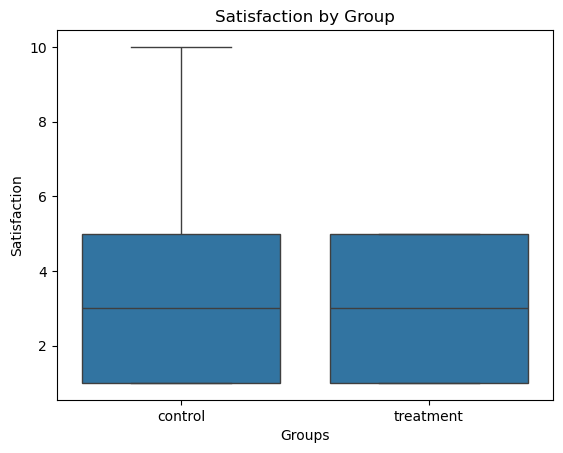

In [326]:
#visualize satisfaction by groups
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Groups', y='Satisfaction', data=ordered_webmd)
plt.title("Satisfaction by Group")
plt.show()

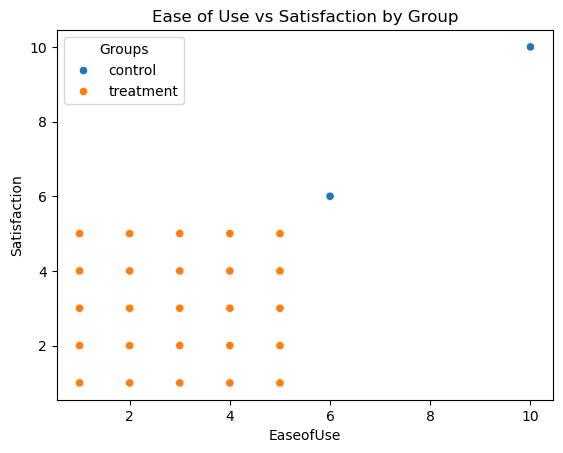

In [336]:
#scatterplot between easeofuse and satisfaction
sns.scatterplot(x='EaseofUse', y='Satisfaction', hue='Groups', data=ordered_webmd)
plt.title("Ease of Use vs Satisfaction by Group")
plt.show()

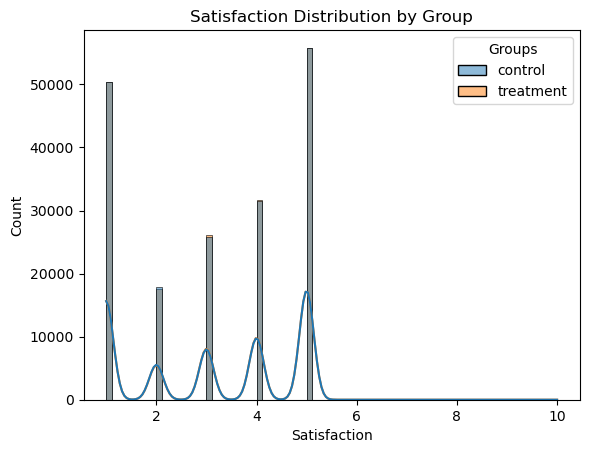

In [352]:
#histogram of Satisfaction Distribution by Group
sns.histplot(x='Satisfaction', hue='Groups', data=ordered_webmd, kde=True)
plt.title("Satisfaction Distribution by Group")
plt.show()

In [400]:
#Build a predictive model using machine learning pipeline
#Objective: Predict whether a review belongs to the control or treatment group based on features like EaseofUse, Effectiveness, and Satisfaction.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [378]:
#first step is to Train-Test Split to evaluate model performance
#X:feature
X=ordered_webmd[['EaseofUse', 'Effectiveness', 'Satisfaction']]
#y:target
y = (ordered_webmd['Groups'] == 'treatment').astype(int)  # Convert to binary: 1 = treatment, 0 = control

In [362]:
print(features.isnull().sum())

EaseofUse        0
Effectiveness    0
Satisfaction     0
dtype: int64


In [380]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [382]:
#print the results
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (290244, 3)
X_test shape: (72562, 3)
y_train shape: (290244,)
y_test shape: (72562,)


In [ ]:
#X_train shape: (290244, 3):
#The number of data points in the training set (80% of the total dataset).
#3 columns: The number of features (predictor variables) used to train the model (EaseofUse, Effectiveness, Satisfaction).

#X_test shape: (72562, 3)
#72,562 rows: The number of data points in the test set (20% of the total dataset).
#3 columns: Same as the training set, the features used for testing the model.

#y_train shape: (290244,)
#290,244 values: Corresponds to the training set's target values (binary 0 for control and 1 for treatment).
#This is a 1-dimensional array (hence the single dimension).

#y_test shape: (72562,)
#72,562 values: Corresponds to the test set's target values.
#this is a 1-dimensional array.

#What it tells us
#Data Split:

#The train_test_split function has correctly divided your data into an 80%-20% split (approximately).
#Training set: 290,244 rows (80% of total rows).
#Test set: 72,562 rows (20% of total rows).

#Consistency:
#The number of rows in X_train matches y_train (290,244).
#The number of rows in X_test matches y_test (72,562).
#This ensures that each row in X has a corresponding target value in y.

#Sufficient Data:
#Both the training and test sets have a substantial number of rows, which is good for:
#Training: Sufficient data for the model to learn patterns.
#Testing: Enough data to evaluate the model’s performance reliably.

In [388]:
#Train the model
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [390]:
#check model object
print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model coefficients: [[-0.00404498  0.00528021 -0.00256389]]
Intercept: [0.00679497]


In [396]:
#evaluate the model accuracy

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.49994487472781896


In [ ]:
#logistic regression model is performing no better than random guessing. This low accuracy suggests that the features used (EaseofUse, Effectiveness, Satisfaction) may not strongly correlate with the target variable (Groups being treatment or control).


In [398]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.32      0.39     36347
           1       0.50      0.68      0.58     36215

    accuracy                           0.50     72562
   macro avg       0.50      0.50      0.48     72562
weighted avg       0.50      0.50      0.48     72562



In [405]:
#Proceed with Random Forest
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [407]:

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Classification Report
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(report_rf)

Random Forest Accuracy: 0.49838758578870485
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.32      0.39     36347
           1       0.50      0.67      0.57     36215

    accuracy                           0.50     72562
   macro avg       0.50      0.50      0.48     72562
weighted avg       0.50      0.50      0.48     72562



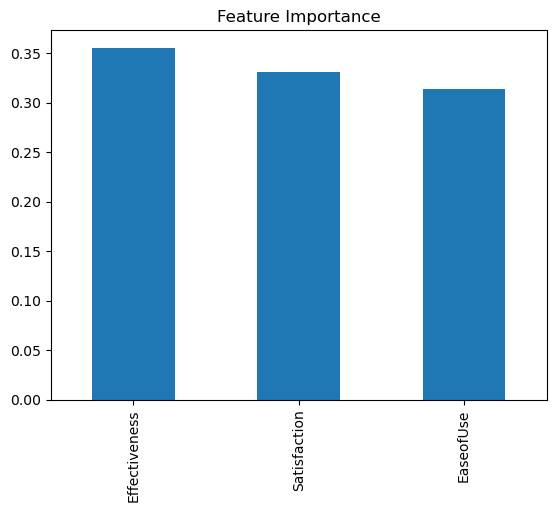

In [409]:
# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Plot feature importances
feature_importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.show()

In [ ]:
#Possible Reasons for Similar Performance between logistic regression and random forest
#1. Features Lack Predictive Power
#The features (EaseofUse, Effectiveness, Satisfaction) might not contain enough information to differentiate between the control and treatment groups.
#Consider adding more relevant features or engineering new ones.
#2. No Strong Patterns in the Data
#The control group was randomly shuffled, and the treatment group was sorted by one or two features. This may result in weak or non-existent patterns that the model can learn.